<a href="https://colab.research.google.com/github/hemangi2204/Data_science/blob/main/Case_Study_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Data Using Pandas Function

df = pd.read_csv('Titanic.csv')
# Shuffle 100 % Dataset
df.sample(frac = 1)

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
797,female,31.0,0,0,8.6833,S,Third,woman,True,1
488,male,30.0,0,0,8.0500,S,Third,man,True,0
167,female,45.0,1,4,27.9000,S,Third,woman,False,0
763,female,36.0,1,2,120.0000,S,First,woman,False,1
725,male,20.0,0,0,8.6625,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
105,male,28.0,0,0,7.8958,S,Third,man,True,0
708,female,22.0,0,0,151.5500,S,First,woman,True,1
656,male,NaN,0,0,7.8958,S,Third,man,True,0
577,female,39.0,1,0,55.9000,S,First,woman,False,1


In [ ]:
# Checking Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [ ]:
# Checking Null Values Information Stats
# df.isnull().sum() : This Code will give us Number of Missing Values in Each column
# len(df) : This Code will give us total number rows present in dataset.
'''
1. If DataColumn having less than 5% of Missing Values, We can impute with Mean or Median in case of Numerical columns and Imputation with Mode will be for  Categorical Column.
2. If Datacolumn having missing values between 5% to 15% then random value can be imputed or better to replace with Median or use KNN imputer.
3. If Datacolumn having more than 15% of missing values then we can drop that column.

'''
print(df.isnull().sum() / len(df) *100)

sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
class        0.000000
who          0.000000
alone        0.000000
survived     0.000000
dtype: float64


In [ ]:
# Data Cleaning and Preprocessing
'''
1.
Based on Following Stats, We find that age column is Non Normal Distributed,Since, Mean =! Median.
2.
Calculating Upper Bound Value and Lower Bound Value
Range =  df['age'].quantile(0.25),df['age'].quantile(0.75)
'''
print(df['age'].agg(['mean','median']))
print(df['age'].quantile(0.25),df['age'].quantile(0.75))

mean      29.699118
median    28.000000
Name: age, dtype: float64
20.125 38.0


In [ ]:
# Imputing age Column
df['age'].fillna(df['age'].median(),inplace = True)

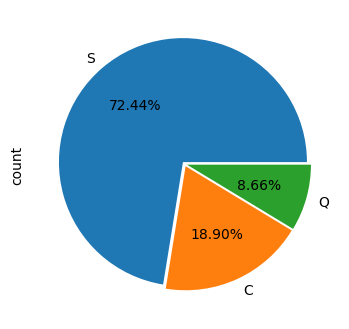

In [ ]:
'''
Data Insight:
1. 72.44% People Board their journey from Southhampton
2. 18.90% People Board their journey from Cherbourg
3. 8.66% People Board their journey from Queenstown
'''
df['embarked'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%',explode = [0.02,0.02,0.02],figsize = (4,5))
plt.show()

In [ ]:
df['embarked'].fillna('S',inplace = True)

In [ ]:
# Find out the People Data who boarded their journey from Southhampton

Southhampton = df[df['embarked'] == 'S']
Southhampton

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
6,male,54.0,0,0,51.8625,S,First,man,True,0
...,...,...,...,...,...,...,...,...,...,...
883,male,28.0,0,0,10.5000,S,Second,man,True,0
884,male,25.0,0,0,7.0500,S,Third,man,True,0
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1


In [ ]:
Southhampton['sex'].value_counts()

,count
sex,
male,441
female,205


In [ ]:
Southhampton['survived'].value_counts()

,count
survived,
0,427
1,219


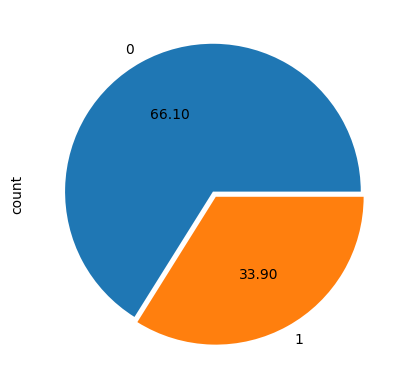

In [ ]:
'''
Data Insights For SouthHampton:
1. 66.10 % People Died where as 33.90 % people Survived.
2. 441 People were reported as Male and 219 were Female
3. Out of 441 Male 77 People were Survived, where as Out of 219 Females 142
   Were Survived.
4. Survival rate for Males 17.41% and for Females 64.84%
'''
Southhampton['survived'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [ ]:
Southhampton[(Southhampton['sex'] == 'male') & (Southhampton['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
17,male,28.00,0,0,13.0000,S,Second,man,True,1
21,male,34.00,0,0,13.0000,S,Second,man,True,1
23,male,28.00,0,0,35.5000,S,First,man,True,1
55,male,28.00,0,0,35.5000,S,First,man,True,1
74,male,32.00,0,0,56.4958,S,Third,man,True,1
...,...,...,...,...,...,...,...,...,...,...
821,male,27.00,0,0,8.6625,S,Third,man,True,1
831,male,0.83,1,1,18.7500,S,Second,child,False,1
838,male,32.00,0,0,56.4958,S,Third,man,True,1
857,male,51.00,0,0,26.5500,S,First,man,True,1


In [ ]:
Southhampton[(Southhampton['sex'] == 'female') & (Southhampton['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
8,female,27.0,0,2,11.1333,S,Third,woman,False,1
10,female,4.0,1,1,16.7000,S,Third,child,False,1
11,female,58.0,0,0,26.5500,S,First,woman,True,1
...,...,...,...,...,...,...,...,...,...,...
862,female,48.0,0,0,25.9292,S,First,woman,True,1
865,female,42.0,0,0,13.0000,S,Second,woman,True,1
871,female,47.0,1,1,52.5542,S,First,woman,False,1
880,female,25.0,0,1,26.0000,S,Second,woman,False,1


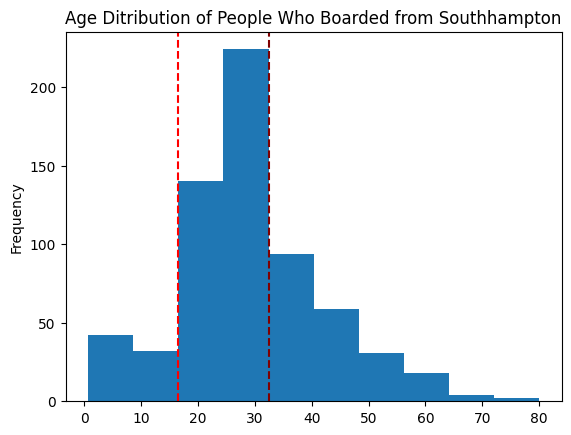

In [ ]:
Southhampton['age'].plot(kind = 'hist')
plt.title('Age Ditribution of People Who Boarded from Southhampton')
plt.axvline(16.5,linestyle = '--',color = 'red')
plt.axvline(32.5,linestyle = '--',color = 'maroon')
plt.show()

In [ ]:
Southhampton['class'].value_counts()

,count
class,
Third,353
Second,164
First,129


In [ ]:
FirstClass_Southhampton = Southhampton[Southhampton['class'] == 'First']
SecondClass_Southhampton = Southhampton[Southhampton['class'] == 'Second']
ThirdClass_Southhampton = Southhampton[Southhampton['class'] == 'Third']

In [ ]:
ThirdClass_Southhampton['survived'].value_counts()

,count
survived,
0,286
1,67


In [ ]:
SecondClass_Southhampton['survived'].value_counts()

,count
survived,
0,88
1,76


In [ ]:
FirstClass_Southhampton['survived'].value_counts()

,count
survived,
1,76
0,53


In [ ]:
Southhampton['fare'].value_counts()

,count
fare,
8.0500,43
13.0000,42
7.8958,33
26.0000,31
10.5000,24
...,...
14.1083,1
50.4958,1
5.0000,1


In [ ]:
Southhampton['fare'].value_counts().head(10)

,count
fare,
8.0500,43
13.0000,42
7.8958,33
26.0000,31
10.5000,24
7.9250,18
7.7750,16
0.0000,15
26.5500,14


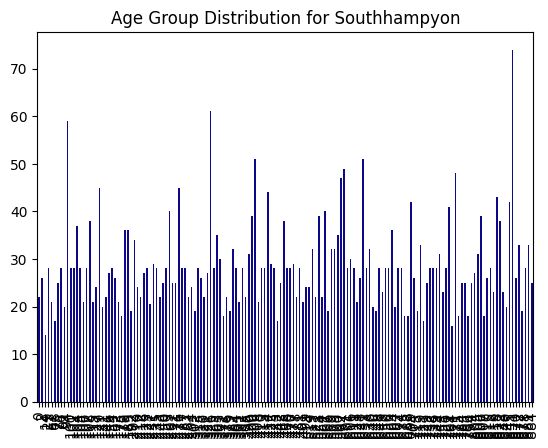

In [ ]:
Southhampton[Southhampton['fare'] < 8]['age'].plot(kind = 'bar',cmap = 'plasma')
plt.title('Age Group Distribution for Southhampyon')
plt.show()

In [ ]:
FirstClass_Southhampton=df[(df['embarked'] == 'S') & (df['class'] == 'First')]
FirstClass_Southhampton

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
3,female,35.0,1,0,53.1000,S,First,woman,False,1
6,male,54.0,0,0,51.8625,S,First,man,True,0
11,female,58.0,0,0,26.5500,S,First,woman,True,1
23,male,28.0,0,0,35.5000,S,First,man,True,1
27,male,19.0,3,2,263.0000,S,First,man,False,0
...,...,...,...,...,...,...,...,...,...,...
862,female,48.0,0,0,25.9292,S,First,woman,True,1
867,male,31.0,0,0,50.4958,S,First,man,True,0
871,female,47.0,1,1,52.5542,S,First,woman,False,1
872,male,33.0,0,0,5.0000,S,First,man,True,0


In [ ]:
# Find out the People Data who boarded their journey from Queenstown

Queenstown = df[df['embarked'] == 'Q']
Queenstown

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
5,male,28.0,0,0,8.4583,Q,Third,man,True,0
16,male,2.0,4,1,29.1250,Q,Third,child,False,0
22,female,15.0,0,0,8.0292,Q,Third,child,True,1
28,female,28.0,0,0,7.8792,Q,Third,woman,True,1
32,female,28.0,0,0,7.7500,Q,Third,woman,True,1
...,...,...,...,...,...,...,...,...,...,...
790,male,28.0,0,0,7.7500,Q,Third,man,True,0
825,male,28.0,0,0,6.9500,Q,Third,man,True,0
828,male,28.0,0,0,7.7500,Q,Third,man,True,1
885,female,39.0,0,5,29.1250,Q,Third,woman,False,0


In [ ]:
Queenstown['sex'].value_counts()

,count
sex,
male,41
female,36


In [ ]:
Queenstown['survived'].value_counts()

,count
survived,
0,47
1,30


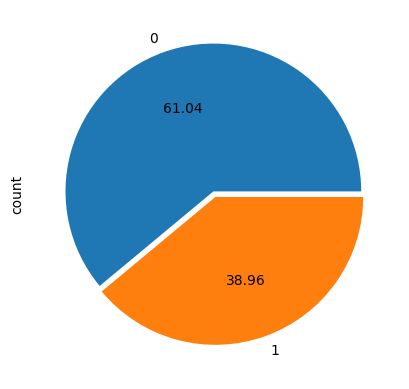

In [ ]:
'''
Data Insights For Queenstown:
1. 61.04 % People Died where as 38.96 % people Survived.
2. 41 People were reported as Male and 36 were Female
3. Out of 441 Male 77 People were Survived, where as Out of 219 Females 142
   Were Survived.
4. Survival rate for Males 17.41% and for Females 64.84%
'''
Queenstown['survived'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [ ]:
Queenstown[(Queenstown['sex'] == 'male') & (Queenstown['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
301,male,28.0,2,0,23.25,Q,Third,man,False,1
510,male,29.0,0,0,7.75,Q,Third,man,True,1
828,male,28.0,0,0,7.75,Q,Third,man,True,1


In [ ]:
Queenstown[(Queenstown['sex'] == 'female') & (Queenstown['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
22,female,15.0,0,0,8.0292,Q,Third,child,True,1
28,female,28.0,0,0,7.8792,Q,Third,woman,True,1
32,female,28.0,0,0,7.7500,Q,Third,woman,True,1
44,female,19.0,0,0,7.8792,Q,Third,woman,True,1
47,female,28.0,0,0,7.7500,Q,Third,woman,True,1
82,female,28.0,0,0,7.7875,Q,Third,woman,True,1
109,female,28.0,1,0,24.1500,Q,Third,woman,False,1
156,female,16.0,0,0,7.7333,Q,Third,woman,True,1
186,female,28.0,1,0,15.5000,Q,Third,woman,False,1
198,female,28.0,0,0,7.7500,Q,Third,woman,True,1


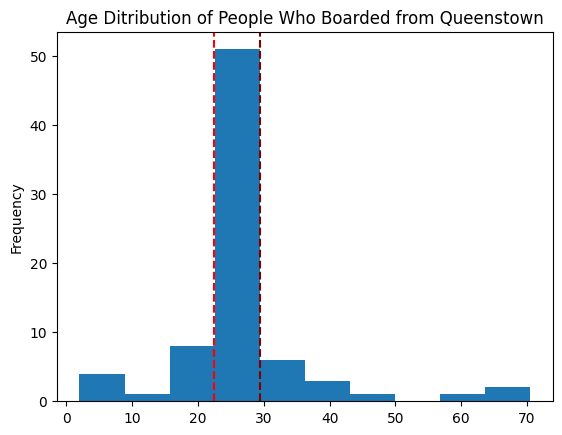

In [ ]:
Queenstown['age'].plot(kind = 'hist')
plt.title('Age Ditribution of People Who Boarded from Queenstown')
plt.axvline(22.5,linestyle = '--',color = 'red')
plt.axvline(29.5,linestyle = '--',color = 'maroon')
plt.show()

In [ ]:
Queenstown['class'].value_counts()

,count
class,
Third,72
Second,3
First,2


In [ ]:
FirstClass_Queenstown = Queenstown[Queenstown['class'] == 'First']
SecondClass_Queenstown = Queenstown[Queenstown['class'] == 'Second']
ThirdClass_Queenstown = Queenstown[Queenstown['class'] == 'Third']

In [ ]:
ThirdClass_Queenstown['survived'].value_counts()

,count
survived,
0,45
1,27


In [ ]:
SecondClass_Queenstown['survived'].value_counts()

,count
survived,
1,2
0,1


In [ ]:
FirstClass_Queenstown['survived'].value_counts()

,count
survived,
0,1
1,1


In [ ]:
Queenstown['fare'].value_counts()

,count
fare,
7.7500,30
15.5000,8
29.1250,5
7.8792,4
7.7333,4
24.1500,3
12.3500,3
90.0000,2
23.2500,2


In [ ]:
Queenstown['fare'].value_counts().head(10)

,count
fare,
7.7500,30
15.5000,8
29.1250,5
7.8792,4
7.7333,4
24.1500,3
12.3500,3
90.0000,2
23.2500,2


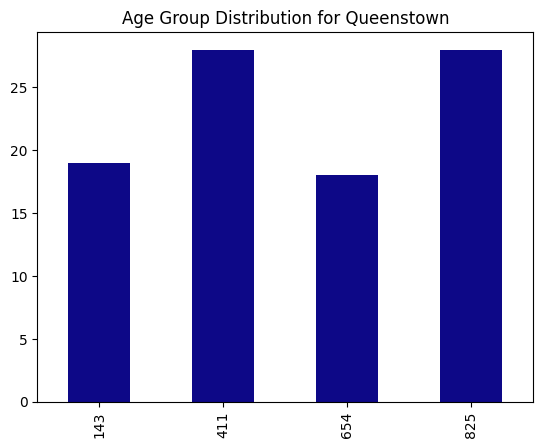

In [ ]:
Queenstown[Queenstown['fare'] < 7]['age'].plot(kind = 'bar',cmap = 'plasma')
plt.title('Age Group Distribution for Queenstown')
plt.show()

In [ ]:
FirstClass_Queenstown=df[(df['embarked'] == 'Q') & (df['class'] == 'First')]
FirstClass_Queenstown

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
245,male,44.0,2,0,90.0,Q,First,man,False,0
412,female,33.0,1,0,90.0,Q,First,woman,False,1


In [ ]:
# Find out the People Data who boarded their journey from Cherbourg
Cherboury = df[df['embarked'] == 'Q']
Cherboury

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
5,male,28.0,0,0,8.4583,Q,Third,man,True,0
16,male,2.0,4,1,29.1250,Q,Third,child,False,0
22,female,15.0,0,0,8.0292,Q,Third,child,True,1
28,female,28.0,0,0,7.8792,Q,Third,woman,True,1
32,female,28.0,0,0,7.7500,Q,Third,woman,True,1
...,...,...,...,...,...,...,...,...,...,...
790,male,28.0,0,0,7.7500,Q,Third,man,True,0
825,male,28.0,0,0,6.9500,Q,Third,man,True,0
828,male,28.0,0,0,7.7500,Q,Third,man,True,1
885,female,39.0,0,5,29.1250,Q,Third,woman,False,0


In [ ]:
Cherboury['sex'].value_counts()

,count
sex,
male,41
female,36


In [ ]:
Cherboury['survived'].value_counts()

,count
survived,
0,47
1,30


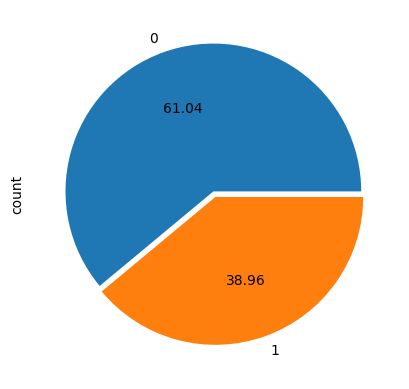

In [ ]:
'''
Data Insights For SouthHampton:
1. 66.10 % People Died where as 33.90 % people Survived.
2. 441 People were reported as Male and 219 were Female
3. Out of 441 Male 77 People were Survived, where as Out of 219 Females 142
   Were Survived.
4. Survival rate for Males 17.41% and for Females 64.84%
'''
Cherboury['survived'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [ ]:
Cherboury[(Cherboury['sex'] == 'male') & (Cherboury['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
301,male,28.0,2,0,23.25,Q,Third,man,False,1
510,male,29.0,0,0,7.75,Q,Third,man,True,1
828,male,28.0,0,0,7.75,Q,Third,man,True,1


In [ ]:
Cherboury[(Cherboury['sex'] == 'female') & (Cherboury['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
22,female,15.0,0,0,8.0292,Q,Third,child,True,1
28,female,28.0,0,0,7.8792,Q,Third,woman,True,1
32,female,28.0,0,0,7.7500,Q,Third,woman,True,1
44,female,19.0,0,0,7.8792,Q,Third,woman,True,1
47,female,28.0,0,0,7.7500,Q,Third,woman,True,1
82,female,28.0,0,0,7.7875,Q,Third,woman,True,1
109,female,28.0,1,0,24.1500,Q,Third,woman,False,1
156,female,16.0,0,0,7.7333,Q,Third,woman,True,1
186,female,28.0,1,0,15.5000,Q,Third,woman,False,1
198,female,28.0,0,0,7.7500,Q,Third,woman,True,1


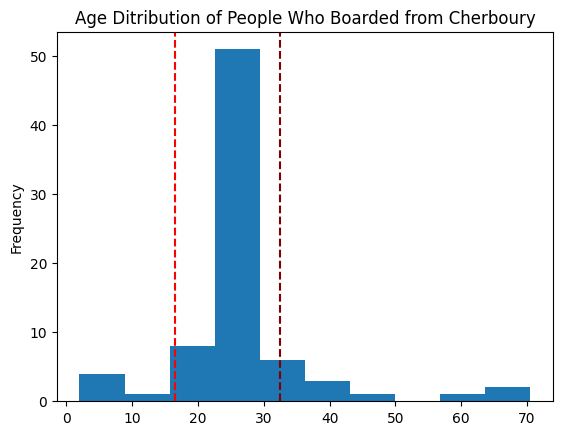

In [ ]:
Cherboury['age'].plot(kind = 'hist')
plt.title('Age Ditribution of People Who Boarded from Cherboury')
plt.axvline(16.5,linestyle = '--',color = 'red')
plt.axvline(32.5,linestyle = '--',color = 'maroon')
plt.show()

In [ ]:
Cherboury['class'].value_counts()

,count
class,
Third,72
Second,3
First,2


In [ ]:
FirstClass_Cherboury = Cherboury[Cherboury['class'] == 'First']
SecondClass_Cherboury = Cherboury[Cherboury['class'] == 'Second']
ThirdClass_Cherboury = Cherboury[Cherboury['class'] == 'Third']

In [ ]:
ThirdClass_Cherboury['survived'].value_counts()

,count
survived,
0,45
1,27


In [ ]:
SecondClass_Cherboury['survived'].value_counts()

,count
survived,
1,2
0,1


In [ ]:
FirstClass_Cherboury['survived'].value_counts()

,count
survived,
0,1
1,1


In [ ]:
Cherboury['fare'].value_counts()

,count
fare,
7.7500,30
15.5000,8
29.1250,5
7.8792,4
7.7333,4
24.1500,3
12.3500,3
90.0000,2
23.2500,2


In [ ]:
Cherboury['fare'].value_counts().head(10)

,count
fare,
7.7500,30
15.5000,8
29.1250,5
7.8792,4
7.7333,4
24.1500,3
12.3500,3
90.0000,2
23.2500,2


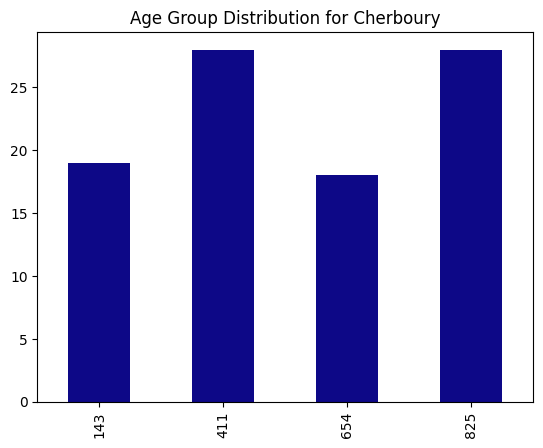

In [ ]:
Cherboury[Cherboury['fare'] < 7]['age'].plot(kind = 'bar',cmap = 'plasma')
plt.title('Age Group Distribution for Cherboury')
plt.show()

In [ ]:
FirstClass_Cherboury=df[(df['embarked'] == 'C') & (df['class'] == 'First')]
FirstClass_Cherboury

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
1,female,38.0,1,0,71.2833,C,First,woman,False,1
30,male,40.0,0,0,27.7208,C,First,man,True,0
31,female,28.0,1,0,146.5208,C,First,woman,False,1
34,male,28.0,1,0,82.1708,C,First,man,False,0
52,female,49.0,1,0,76.7292,C,First,woman,False,1
...,...,...,...,...,...,...,...,...,...,...
839,male,28.0,0,0,29.7000,C,First,man,True,1
842,female,30.0,0,0,31.0000,C,First,woman,True,1
849,female,28.0,1,0,89.1042,C,First,woman,False,1
879,female,56.0,0,1,83.1583,C,First,woman,False,1


In [ ]:
# Evaluating Descriptive Stats : Method 01
#EDA : Univartiate Analysis
df.describe()

,age,sibsp,parch,fare,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208,0.383838
std,13.019697,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,35.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# Numerical columns
Numerical_col = df.select_dtypes(include = ['int64', 'float64'])
#Numerical_col = df.select_dtypes(exclude= = 'object')

# Categorical column
Categorical_col = df.select_dtypes(include = 'object')

In [ ]:
# Evaluating Descriptive Stats : Method 02
# EDA : Univariate Analysis

from collections import OrderedDict

stats = []

for i in Numerical_col:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Minimum': df[i].min(),
        'Maximum': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Standard Deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })

    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Minimum,Maximum,Range,Standard Deviation,Skewness,Kurtosis,Q1,Q3,IQR
0,age,891,29.361582,28.0000,0.42,80.0000,79.5800,13.019697,0.510245,0.993871,22.0000,35.0,13.0000
1,sibsp,891,0.523008,0.0000,0.00,8.0000,8.0000,1.102743,3.695352,17.880420,0.0000,1.0,1.0000
2,parch,891,0.381594,0.0000,0.00,6.0000,6.0000,0.806057,2.749117,9.778125,0.0000,0.0,0.0000
3,fare,891,32.204208,14.4542,0.00,512.3292,512.3292,49.693429,4.787317,33.398141,7.9104,31.0,23.0896
4,survived,891,0.383838,0.0000,0.00,1.0000,1.0000,0.486592,0.478523,-1.775005,0.0000,1.0,1.0000


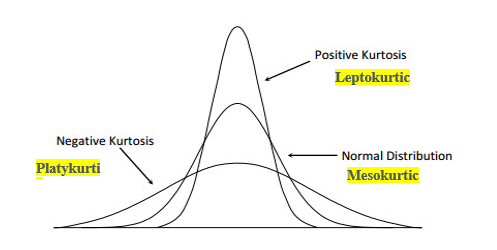

In [ ]:
'''
Insights
1. Mean != Median : The dataset in normal
Skew impute allways impute wuth (median)
KURTOSIS
Mesokurtic (KURTOSIS = 3)
Leptokurtic (KURTOSIS < 3)
Platykurtic (KURTOSIS < 3)
'''
'''

'\nInsights \n1. Mean != Median : The dataset in normal \nSkew impute allways impute wuth (median)\n'

In [ ]:
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,28.0,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


<Axes: xlabel='class', ylabel='fare'>

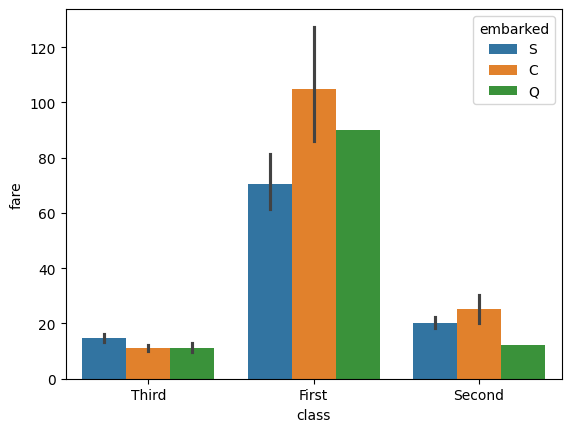

In [ ]:
sns.barplot(data= df,x= df['class'],y= df['fare'],hue= df['embarked'])

<Axes: xlabel='class', ylabel='fare'>

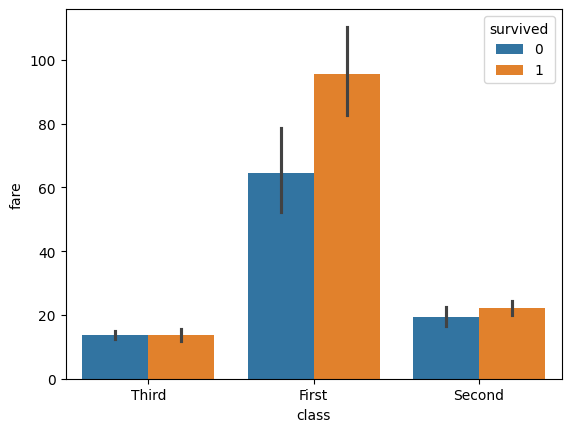

In [ ]:
sns.barplot(data= df,x= df['class'],y= df['fare'],hue= df['survived'])